In [2]:
import pandas as pd
import numpy as np
# df=pd.read_csv(r"diabetic_data.csv")
df=pd.read_csv (r"C:\Users\anura\Downloads\diabetic_data.csv")

In [3]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [4]:
len(df['readmitted'])

101766

In [5]:
df['readmitted']=df['readmitted'].replace(['NO','>30','<30'],['0','0','1'])
df['readmitted']=df['readmitted'].astype('int')

In [6]:
#dropping encounter_id,patient_nbr as it is just identifier 
#weight as it contains 97% null values
#examide, citogliption as they have only one categorical value
#diag_1,diag_2,diag_3 as we are considering number_of_diagnosis
df=df.drop(['encounter_id','patient_nbr','weight','examide','citoglipton','diag_1','diag_2','diag_3'],axis=1)

In [7]:
df.replace('?',np.nan,inplace=True)

In [8]:
df.isnull().sum()

race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose      

In [9]:
#discharge_disposition_id informs where the patient has gone after discharging. Ids 11,13,14,19,20,21 represent death or Hospice they cannot be returned
df=df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [10]:
#Numerical Columns in dataset
df_num_cols=df[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']]
df_num_cols.isnull().sum()

time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
dtype: int64

In [11]:
df_num_cols=pd.concat([df_num_cols],axis=1)

In [12]:
df_num_cols.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')

In [13]:
df_num_cols.corr()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
time_in_hospital,1.000000,0.319855,0.189908,0.463757,-0.009214,-0.009573,0.074251,0.220600
num_lab_procedures,0.319855,1.000000,0.051715,0.265148,-0.007610,-0.000980,0.039908,0.149663
num_procedures,0.189908,0.051715,1.000000,0.381931,-0.025263,-0.038715,-0.067021,0.070460
num_medications,0.463757,0.265148,0.381931,1.000000,0.046037,0.014028,0.065266,0.261639
number_outpatient,-0.009214,-0.007610,-0.025263,0.046037,1.000000,0.091668,0.108015,0.094829
number_emergency,-0.009573,-0.000980,-0.038715,0.014028,0.091668,1.000000,0.267702,0.055994
number_inpatient,0.074251,0.039908,-0.067021,0.065266,0.108015,0.267702,1.000000,0.104737
number_diagnoses,0.220600,0.149663,0.070460,0.261639,0.094829,0.055994,0.104737,1.000000


In [14]:
#Categorical Columns in dataset
categorical_columns=['race', 'gender','payer_code','max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']

In [15]:
df['race']=df['race'].fillna('UKN')
df['medical_specialty']=df['medical_specialty'].fillna('UKN')
df['payer_code']=df['payer_code'].fillna('UKN')


In [16]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,UKN,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,[10-20),1,1,7,3,UKN,UKN,59,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,UKN,UKN,11,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,[30-40),1,1,7,2,UKN,UKN,44,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,[40-50),1,1,7,1,UKN,UKN,51,...,No,Steady,No,No,No,No,No,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1,3,7,3,MC,UKN,51,...,No,Down,No,No,No,No,No,Ch,Yes,0
101762,AfricanAmerican,Female,[80-90),1,4,5,5,MC,UKN,33,...,No,Steady,No,No,No,No,No,No,Yes,0
101763,Caucasian,Male,[70-80),1,1,7,1,MC,UKN,53,...,No,Down,No,No,No,No,No,Ch,Yes,0
101764,Caucasian,Female,[80-90),2,3,7,10,MC,Surgery-General,45,...,No,Up,No,No,No,No,No,Ch,Yes,0


In [17]:
df1=df.groupby('medical_specialty').size().sort_values(ascending=False)

In [18]:
df1.head(10)

medical_specialty
UKN                           48616
InternalMedicine              14237
Emergency/Trauma               7419
Family/GeneralPractice         7252
Cardiology                     5279
Surgery-General                3059
Nephrology                     1539
Orthopedics                    1392
Orthopedics-Reconstructive     1230
Radiologist                    1121
dtype: int64

In [19]:
top_10=['UKN','InternalMedicine','Emergency/Trauma','Family/GeneralPractice','Cardiology','Surgery-General','Nephrology','Orthopedics','Orthopedics-Reconstructive','Radiologist']

In [20]:
df.loc[~df.medical_specialty.isin(top_10),'medical_specialty']= 'Other'

In [21]:
df.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
count,99343.000000,99343.000000,99343.000000,99343.000000,99343.000000,99343.000000,99343.000000,99343.000000,99343.000000,99343.000000,99343.000000,99343.000000
mean,2.030259,3.517882,5.731083,4.379332,42.906929,1.334236,15.979062,0.369246,0.198444,0.630935,7.401709,0.113888
std,1.446373,5.184359,4.065029,2.968409,19.610032,1.702786,8.094909,1.265142,0.937734,1.260428,1.941013,0.317677
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,3.000000,3.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,0.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,1.000000


In [22]:
df['admission_type_id']=df['admission_type_id'].astype('str')
df['discharge_disposition_id']=df['discharge_disposition_id'].astype('str')
df['admission_source_id']=df['admission_source_id'].astype('str')

In [23]:
df['admission_type_id'].unique()

array(['6', '1', '2', '3', '4', '5', '8', '7'], dtype=object)

In [24]:
df.to_csv('df_naive.csv')

In [25]:
df_cat=pd.get_dummies(df[categorical_columns+ ['admission_type_id','discharge_disposition_id','admission_source_id','medical_specialty']],drop_first=True)

In [26]:
list(df_cat)

['race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'race_UKN',
 'gender_Male',
 'gender_Unknown/Invalid',
 'payer_code_CH',
 'payer_code_CM',
 'payer_code_CP',
 'payer_code_DM',
 'payer_code_FR',
 'payer_code_HM',
 'payer_code_MC',
 'payer_code_MD',
 'payer_code_MP',
 'payer_code_OG',
 'payer_code_OT',
 'payer_code_PO',
 'payer_code_SI',
 'payer_code_SP',
 'payer_code_UKN',
 'payer_code_UN',
 'payer_code_WC',
 'max_glu_serum_>300',
 'max_glu_serum_None',
 'max_glu_serum_Norm',
 'A1Cresult_>8',
 'A1Cresult_None',
 'A1Cresult_Norm',
 'metformin_No',
 'metformin_Steady',
 'metformin_Up',
 'repaglinide_No',
 'repaglinide_Steady',
 'repaglinide_Up',
 'nateglinide_No',
 'nateglinide_Steady',
 'nateglinide_Up',
 'chlorpropamide_No',
 'chlorpropamide_Steady',
 'chlorpropamide_Up',
 'glimepiride_No',
 'glimepiride_Steady',
 'glimepiride_Up',
 'acetohexamide_Steady',
 'glipizide_No',
 'glipizide_Steady',
 'glipizide_Up',
 'glyburide_No',
 'glyburide_Steady',
 'glyburide_Up',
 't

In [27]:
df_cat

,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UKN,gender_Male,gender_Unknown/Invalid,payer_code_CH,payer_code_CM,payer_code_CP,...,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_InternalMedicine,medical_specialty_Nephrology,medical_specialty_Orthopedics,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Other,medical_specialty_Radiologist,medical_specialty_Surgery-General,medical_specialty_UKN
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
101762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
101763,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
101764,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
df_num_cols

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,1,41,0,1,0,0,0,1
1,3,59,0,18,0,0,0,9
2,2,11,5,13,2,0,1,6
3,2,44,1,16,0,0,0,7
4,1,51,0,8,0,0,0,5
...,...,...,...,...,...,...,...,...
101761,3,51,0,16,0,0,0,9
101762,5,33,3,18,0,0,1,9
101763,1,53,0,9,1,0,0,13
101764,10,45,2,21,0,0,1,9


In [29]:
df['age']

0          [0-10)
1         [10-20)
2         [20-30)
3         [30-40)
4         [40-50)
           ...   
101761    [70-80)
101762    [80-90)
101763    [70-80)
101764    [80-90)
101765    [70-80)
Name: age, Length: 99343, dtype: object

In [30]:
dff=pd.concat([df_cat,df_num_cols,df['age']],axis=1)

In [31]:
len(dff)

99343

In [32]:
dff

,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UKN,gender_Male,gender_Unknown/Invalid,payer_code_CH,payer_code_CM,payer_code_CP,...,medical_specialty_UKN,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,age
0,0,1,0,0,0,0,0,0,0,0,...,0,1,41,0,1,0,0,0,1,[0-10)
1,0,1,0,0,0,0,0,0,0,0,...,1,3,59,0,18,0,0,0,9,[10-20)
2,0,0,0,0,0,0,0,0,0,0,...,1,2,11,5,13,2,0,1,6,[20-30)
3,0,1,0,0,0,1,0,0,0,0,...,1,2,44,1,16,0,0,0,7,[30-40)
4,0,1,0,0,0,1,0,0,0,0,...,1,1,51,0,8,0,0,0,5,[40-50)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,0,0,0,0,1,0,0,0,0,...,1,3,51,0,16,0,0,0,9,[70-80)
101762,0,0,0,0,0,0,0,0,0,0,...,1,5,33,3,18,0,0,1,9,[80-90)
101763,0,1,0,0,0,1,0,0,0,0,...,1,1,53,0,9,1,0,0,13,[70-80)
101764,0,1,0,0,0,0,0,0,0,0,...,0,10,45,2,21,0,0,1,9,[80-90)


In [33]:
dff.dtypes

race_Asian            uint8
race_Caucasian        uint8
race_Hispanic         uint8
race_Other            uint8
race_UKN              uint8
                      ...  
number_outpatient     int64
number_emergency      int64
number_inpatient      int64
number_diagnoses      int64
age                  object
Length: 142, dtype: object

In [34]:
age_id = {'[0-10)':5, 
          '[10-20)':15, 
          '[20-30)':25, 
          '[30-40)':35, 
          '[40-50)':45, 
          '[50-60)':55,
          '[60-70)':65, 
          '[70-80)':75, 
          '[80-90)':85, 
          '[90-100)':95}
dff['age_group'] = dff.age.replace(age_id)

In [35]:
dff.columns

Index(['race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other',
       'race_UKN', 'gender_Male', 'gender_Unknown/Invalid', 'payer_code_CH',
       'payer_code_CM', 'payer_code_CP',
       ...
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'age', 'age_group'],
      dtype='object', length=143)

In [36]:
dff=pd.concat([dff,df['readmitted']],axis=1)

In [37]:
dff.columns

Index(['race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other',
       'race_UKN', 'gender_Male', 'gender_Unknown/Invalid', 'payer_code_CH',
       'payer_code_CM', 'payer_code_CP',
       ...
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'age', 'age_group', 'readmitted'],
      dtype='object', length=144)

In [38]:
dff.dtypes

race_Asian           uint8
race_Caucasian       uint8
race_Hispanic        uint8
race_Other           uint8
race_UKN             uint8
                     ...  
number_inpatient     int64
number_diagnoses     int64
age                 object
age_group            int64
readmitted           int32
Length: 144, dtype: object

In [39]:
dff=dff.drop(['age'],axis=1)

In [40]:
dff.dtypes

race_Asian          uint8
race_Caucasian      uint8
race_Hispanic       uint8
race_Other          uint8
race_UKN            uint8
                    ...  
number_emergency    int64
number_inpatient    int64
number_diagnoses    int64
age_group           int64
readmitted          int32
Length: 143, dtype: object

In [41]:
df=dff

In [42]:
df.corr()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UKN,gender_Male,gender_Unknown/Invalid,payer_code_CH,payer_code_CM,payer_code_CP,...,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,age_group,readmitted
race_Asian,1.000000,-0.137092,-0.011482,-0.009782,-0.012098,0.005587,-0.000438,0.000344,-0.001757,-0.008644,...,-0.011305,-0.007866,0.000007,-0.027157,-0.013140,-0.009159,-0.010603,-0.015264,0.001773,-0.002607
race_Caucasian,-0.137092,1.000000,-0.247436,-0.210791,-0.260697,0.055796,-0.009445,0.002397,-0.017092,0.019741,...,-0.006125,-0.024138,0.032885,0.057437,0.058531,-0.021769,-0.002150,0.109863,0.168633,0.007524
race_Hispanic,-0.011482,-0.247436,1.000000,-0.017655,-0.021835,-0.000092,-0.000791,-0.003557,-0.004804,0.001804,...,-0.015944,-0.001632,-0.019246,-0.035363,-0.004726,0.004851,-0.002016,-0.036339,-0.063343,-0.003980
race_Other,-0.009782,-0.210791,-0.017655,1.000000,-0.018601,0.009541,0.014487,-0.002435,-0.002358,-0.006179,...,-0.005035,0.001678,0.014092,-0.013289,-0.010374,0.005943,-0.017235,-0.015509,-0.025632,-0.006201
race_UKN,-0.012098,-0.260697,-0.021835,-0.018601,1.000000,0.011184,0.023877,-0.002144,-0.013591,0.005038,...,-0.004356,0.008451,-0.004054,-0.003902,-0.021031,-0.024857,-0.039403,-0.057624,0.005907,-0.014197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
number_emergency,-0.009159,-0.021769,0.004851,0.005943,-0.024857,-0.021463,-0.001163,-0.002608,0.010551,-0.013962,...,-0.009573,-0.000980,-0.038715,0.014028,0.091668,1.000000,0.267702,0.055994,-0.087568,0.060885
number_inpatient,-0.010603,-0.002150,-0.002016,-0.017235,-0.039403,-0.015188,-0.002751,-0.010061,-0.006691,-0.025608,...,0.074251,0.039908,-0.067021,0.065266,0.108015,0.267702,1.000000,0.104737,-0.044337,0.168326
number_diagnoses,-0.015264,0.109863,-0.036339,-0.015509,-0.057624,-0.003421,-0.003969,0.006858,0.032343,0.008346,...,0.220600,0.149663,0.070460,0.261639,0.094829,0.055994,0.104737,1.000000,0.241269,0.053580
age_group,0.001773,0.168633,-0.063343,-0.025632,0.005907,-0.050515,0.002041,-0.008617,0.045918,-0.081214,...,0.107077,0.016323,-0.027885,0.043166,0.023671,-0.087568,-0.044337,0.241269,1.000000,0.022196


In [43]:
df = df.sample(n = len(df))
df = df.reset_index(drop = True)

In [44]:
df_valid_test=df.sample(frac=0.30)

In [45]:
df_test = df_valid_test.sample(frac = 0.5)
df_valid = df_valid_test.drop(df_test.index)
df_train=df.drop(df_valid_test.index)

In [46]:
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

In [47]:
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.readmitted.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.readmitted.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.readmitted.values)))


Test prevalence(n = 14902):0.114
Valid prevalence(n = 14901):0.112
Train all prevalence(n = 69540):0.114


In [48]:
rows_pos = df_train.readmitted == 1
df_train_pos = df_train.loc[rows_pos]
df_train_neg = df_train.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos))],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train)).reset_index(drop = True)


In [49]:
df_train

,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UKN,gender_Male,gender_Unknown/Invalid,payer_code_CH,payer_code_CM,payer_code_CP,...,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,age_group,readmitted
0,0,0,0,1,0,0,0,0,0,0,...,3,54,0,18,1,0,0,9,45,1
1,0,1,0,0,0,1,0,0,0,1,...,7,48,0,27,11,0,0,9,75,1
2,0,1,0,0,0,0,0,0,0,0,...,5,2,0,16,0,0,2,4,75,0
3,0,1,0,0,0,0,0,0,0,1,...,5,50,1,30,4,0,1,9,55,1
4,0,0,0,0,0,0,0,0,0,0,...,5,46,2,10,0,0,0,9,65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15877,0,1,0,0,0,0,0,0,0,0,...,3,42,0,23,0,0,1,8,85,1
15878,0,0,0,0,0,0,0,0,0,0,...,6,59,5,18,0,0,2,7,65,1
15879,0,1,0,0,0,0,0,0,0,0,...,7,7,3,5,0,0,2,9,85,0
15880,0,1,0,0,0,1,0,0,0,0,...,5,19,3,16,0,0,0,5,55,0


In [50]:
X_train = df_train.loc[:, df_train.columns != 'readmitted']
y_train=df_train['readmitted']
X_valid =  df_valid.loc[:, df_valid.columns != 'readmitted']
y_valid=df_valid['readmitted']

In [51]:
X_test =  df_test.loc[:, df_test.columns != 'readmitted']
y_test=df_test['readmitted']

In [52]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [53]:
df_train.describe()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UKN,gender_Male,gender_Unknown/Invalid,payer_code_CH,payer_code_CM,payer_code_CP,...,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,age_group,readmitted
count,15882.000000,15882.000000,15882.000000,15882.000000,15882.000000,15882.000000,15882.0,15882.000000,15882.000000,15882.000000,...,15882.000000,15882.000000,15882.000000,15882.000000,15882.000000,15882.000000,15882.000000,15882.000000,15882.000000,15882.000000
mean,0.006485,0.749717,0.020778,0.013411,0.021786,0.460269,0.0,0.001511,0.018700,0.021408,...,4.545901,43.421169,1.319670,16.352600,0.393716,0.258406,0.884334,7.531545,66.228435,0.500000
std,0.080273,0.433190,0.142646,0.115032,0.145988,0.498435,0.0,0.038845,0.135469,0.144744,...,3.010728,19.418490,1.681115,8.097749,1.264450,1.139794,1.602775,1.883662,15.778465,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,2.000000,32.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000,55.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,9.000000,65.000000,0.500000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,...,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,75.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,...,14.000000,109.000000,6.000000,72.000000,42.000000,64.000000,21.000000,16.000000,95.000000,1.000000


In [54]:
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

In [55]:
X_test_tf = scaler.transform(X_test)

In [56]:
y_test

89284    0
21186    0
97825    0
17302    0
68200    0
        ..
78155    0
48473    0
11358    0
29578    0
11099    1
Name: readmitted, Length: 14902, dtype: int32

In [57]:
pd.DataFrame(X_train_tf)[9].unique()


array([-0.14790607,  6.7610476 ])

In [58]:
X_train.shape

(15882, 142)

In [59]:
X_train_tf.shape

(15882, 142)

In [60]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

In [61]:
thresh = 0.5

In [62]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train_tf, y_train)

LogisticRegression(max_iter=1000)

In [63]:
print(lr.coef_, lr.intercept_)

[[-0.01694354 -0.0217438  -0.02302608  0.008454   -0.05301265  0.01636876
   0.          0.0022721  -0.01683892 -0.00984012 -0.03443803  0.
  -0.0147621  -0.02966889 -0.0099401   0.02800528  0.00262838 -0.01097695
  -0.02226391  0.00973061 -0.02131511  0.06086973 -0.02386157 -0.00378633
  -0.03792018 -0.12472472 -0.03997726  0.03380302  0.0497702  -0.01181419
   0.01868298 -0.04659142 -0.03778008 -0.10988132 -0.11208501 -0.01641021
  -0.2462823  -0.2473978  -0.10039043  0.00251291 -0.00251291  0.
  -0.05580199 -0.09597359  0.02754835  0.         -0.02725672 -0.06029875
  -0.0229029   0.10396023  0.06269377  0.01819202 -0.00447751  0.00231654
  -0.0146102  -0.00289055  0.26200753  0.23028863  0.04829047 -0.169919
  -0.18709974  0.0739093  -0.07593459 -0.05268722  0.          0.
   0.00238891  0.         -0.03801426 -0.06547996 -0.03098199  0.01717804
  -0.01193061 -0.05804043 -0.00767716  0.          0.          0.
  -0.03749501  0.11087563  0.04949698 -0.00276109  0.         -0.0300737

In [64]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.672
accuracy:0.619
recall:0.548
precision:0.639
specificity:0.690
prevalence:0.500
 
Validation:
AUC:0.665
accuracy:0.669
recall:0.548
precision:0.179
specificity:0.684
prevalence:0.112
 


In [65]:
#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

SGDClassifier(alpha=0.1, loss='log', random_state=42)

In [66]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descend')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Stochastic Gradient Descend
Training:
AUC:0.669
accuracy:0.618
recall:0.556
precision:0.635
specificity:0.680
prevalence:0.500
 
Validation:
AUC:0.663
accuracy:0.663
recall:0.563
precision:0.179
specificity:0.675
prevalence:0.112
 


In [67]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(n_neighbors=100)

In [68]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.642
accuracy:0.599
recall:0.486
precision:0.627
specificity:0.671
prevalence:0.500
 
Validation:
AUC:0.617
accuracy:0.665
recall:0.479
precision:0.163
specificity:0.643
prevalence:0.112
 


In [69]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB()

In [70]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.623
accuracy:0.541
recall:0.136
precision:0.718
specificity:0.947
prevalence:0.500
 
Validation:
AUC:0.624
accuracy:0.853
recall:0.155
precision:0.251
specificity:0.942
prevalence:0.112
 


In [72]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from tqdm import tqdm
import seaborn as sns
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# LogisticRegression

In [76]:
class LogisticRegression:
    def __init__(self, X_train, y_train,X_test,y_test,learningRate, tolerance, maxIteration=20000, index=[], drop=False):
        self.X_train=X_train
        self.y_train=y_train
        self.X_test=X_test
        self.y_test=y_test
        self.learningRate=learningRate
        self.tolerance=tolerance
        self.maxIteration=maxIteration
        self.index=index
        self.drop=drop
    
    def addX0(self,X):
        return np.column_stack([np.ones([X.shape[0],1]),X])
    
    def sigmoid(self,z):
        sig=1/(1+np.exp(-z))
        return sig
    
    def costFunction(self,X,y):
        sig=self.sigmoid(X.dot(self.w))
        pred=y*np.log(sig)+(1-y)*np.log(1-sig)
        cost=pred.sum()
        return cost
    
    def gradient(self, X,y):
        sig=self.sigmoid(X.dot(self.w))
        grad=(sig-y).dot(X)
        return grad
    
    def gradientDescent(self,X,y):
        costSequence=[]
        last=float('inf')
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate*(self.gradient(X,y))
            cur_cost= self.costFunction(X,y)
            diff=last-cur_cost
#             last=cur_cost
            costSequence.append(abs(cur_cost))
#             costSequence.append(cur_cost)
            if diff<self.tolerance:
                print("the model stopped. Converged at {}".format(i))
                break
#         print(costSequence)        
        self.plotCost(costSequence)
        return
    
    def plotCost(self, costSequence):
        axis=list(range(0, len(costSequence),1))
        fig, ax = plt.subplots()
        ax.plot(axis, costSequence)
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Cost Function')
        ax.set_title('Cost Function')
        ax.grid()
        plt.show()
    
    
    def predict(self, X):
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)
    
    def evaluate(self, y, y_hat):
        y = (y==1)
        y_hat = (y_hat==1)
        accuracy= (y==y_hat).sum()/y.size
        recall=(y&y_hat).sum()/y.sum()
        return accuracy, recall
    
    def runModel(self):
        self.X_train, self.y_train, self.X_test, self.y_test = self.X_train, self.y_train, self.X_test, self.y_test       
        self.w=np.ones(self.X_train.shape[1], dtype=np.float64)*0
        self.gradientDescent(self.X_train, self.y_train)
        print('The model params are {}'.format(self.w))
        
        y_hat_train=self.predict(self.X_train)
        accuracy, recall = self.evaluate(self.y_train, y_hat_train)
       
        print("Evaluation for training data: \n")
        print("Accuracy", accuracy)learningRate=0.00000000001,tolerance=0.0000001
        print("Recall", recall)
        
        y_hat_test=self.predict(self.X_test)
        accuracy_test, recall_test = self.evaluate(self.y_test, y_hat_test)
        
        print("\nEvaluation for test data: \n")
        print("Accuracy", accuracy_test)
        print("Recall", recall_test)
       
        
        return 

In [77]:
regression=LogisticRegression(X_train_tf,y_train,X_valid_tf,y_valid,learningRate=0.00000000001,tolerance=0.0000001)

100%|████████████████████████████████████████████████████████████████████████████| 20000/20000 [04:15<00:00, 78.33it/s]


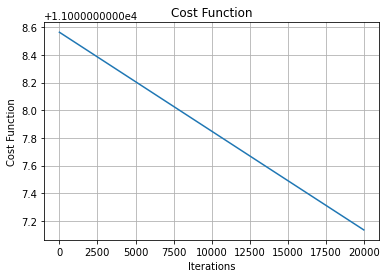

The model params are [-1.61798733e-05  1.77469497e-05 -1.68141727e-05 -8.62957384e-07
 -5.75007796e-05 -9.61478864e-06  0.00000000e+00 -5.14286078e-06
 -6.64624393e-06 -2.20907047e-05 -1.42677639e-05  0.00000000e+00
 -2.03217846e-05  2.49525405e-05 -6.00682405e-09  2.10004676e-05
  8.71213670e-06 -1.26001880e-05 -2.57318211e-05  4.19999245e-06
 -2.97731815e-05  2.98352577e-05 -3.74917237e-05 -1.13912041e-05
  2.83903859e-05 -4.60076043e-05  1.17369255e-05 -1.65635675e-05
  5.00422840e-05 -4.28457570e-05  7.13359291e-05 -6.36176257e-05
 -3.83566010e-05 -1.76057955e-05  1.12247816e-05  1.92475874e-05
  9.08422443e-06 -4.69412585e-06 -2.38136187e-05  2.03334061e-09
 -2.03334061e-09  0.00000000e+00  1.84720163e-05 -2.99416802e-05
  3.19079596e-05  0.00000000e+00  8.93725016e-06 -1.35286998e-05
  1.09015246e-06  2.66816742e-05 -2.41127488e-05 -4.40110876e-06
 -9.83573005e-10  9.76215456e-06 -1.12402150e-05 -2.28370148e-09
  2.53244752e-05 -2.53194618e-05  7.56368892e-06  1.04940346e-05
 -1.

In [78]:
regression.runModel()

In [80]:
regression=LogisticRegression(X_train_tf,y_train,X_test_tf,y_test,learningRate=0.00000000001,tolerance=0.0000001)

100%|████████████████████████████████████████████████████████████████████████████| 20000/20000 [03:38<00:00, 91.51it/s]


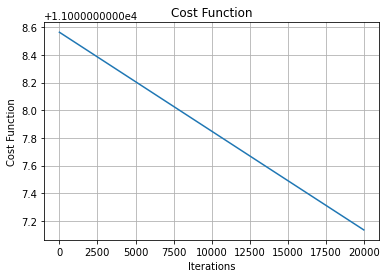

The model params are [-1.61798733e-05  1.77469497e-05 -1.68141727e-05 -8.62957384e-07
 -5.75007796e-05 -9.61478864e-06  0.00000000e+00 -5.14286078e-06
 -6.64624393e-06 -2.20907047e-05 -1.42677639e-05  0.00000000e+00
 -2.03217846e-05  2.49525405e-05 -6.00682405e-09  2.10004676e-05
  8.71213670e-06 -1.26001880e-05 -2.57318211e-05  4.19999245e-06
 -2.97731815e-05  2.98352577e-05 -3.74917237e-05 -1.13912041e-05
  2.83903859e-05 -4.60076043e-05  1.17369255e-05 -1.65635675e-05
  5.00422840e-05 -4.28457570e-05  7.13359291e-05 -6.36176257e-05
 -3.83566010e-05 -1.76057955e-05  1.12247816e-05  1.92475874e-05
  9.08422443e-06 -4.69412585e-06 -2.38136187e-05  2.03334061e-09
 -2.03334061e-09  0.00000000e+00  1.84720163e-05 -2.99416802e-05
  3.19079596e-05  0.00000000e+00  8.93725016e-06 -1.35286998e-05
  1.09015246e-06  2.66816742e-05 -2.41127488e-05 -4.40110876e-06
 -9.83573005e-10  9.76215456e-06 -1.12402150e-05 -2.28370148e-09
  2.53244752e-05 -2.53194618e-05  7.56368892e-06  1.04940346e-05
 -1.

In [81]:
regression.runModel()

# Neural Network

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation
from keras.layers import Activation, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [83]:
model = Sequential()
model.add(Dense(142, input_dim=142, activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(2, activation='softmax'))

In [84]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.00001),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
history=model.fit(
    X_train,y_train,
    epochs=300, #can change the epoch
    validation_split=0.15, verbose=1, batch_size=256)

Epoch 1/300
53/53 [==============================] - 1s 15ms/step - loss: 0.6165 - sparse_categorical_accuracy: 0.6557 - val_loss: 0.6592 - val_sparse_categorical_accuracy: 0.6085


C:\Users\anura\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Epoch 2/300
53/53 [==============================] - 1s 11ms/step - loss: 0.6180 - sparse_categorical_accuracy: 0.6531 - val_loss: 0.6594 - val_sparse_categorical_accuracy: 0.6043
Epoch 3/300
53/53 [==============================] - 1s 16ms/step - loss: 0.6161 - sparse_categorical_accuracy: 0.6540 - val_loss: 0.6661 - val_sparse_categorical_accuracy: 0.6009
Epoch 4/300
53/53 [==============================] - 1s 25ms/step - loss: 0.6167 - sparse_categorical_accuracy: 0.6512 - val_loss: 0.6600 - val_sparse_categorical_accuracy: 0.6110
Epoch 5/300
53/53 [==============================] - 1s 22ms/step - loss: 0.6156 - sparse_categorical_accuracy: 0.6560 - val_loss: 0.6664 - val_sparse_categorical_accuracy: 0.6001
Epoch 6/300
53/53 [==============================] - 1s 21ms/step - loss: 0.6174 - sparse_categorical_accuracy: 0.6546 - val_loss: 0.6628 - val_sparse_categorical_accuracy: 0.6051
Epoch 7/300
53/53 [==============================] - 1s 22ms/step - loss: 0.6171 - sparse_categorica

53/53 [==============================] - 0s 8ms/step - loss: 0.6110 - sparse_categorical_accuracy: 0.6600 - val_loss: 0.6684 - val_sparse_categorical_accuracy: 0.6047
Epoch 48/300
53/53 [==============================] - 1s 10ms/step - loss: 0.6153 - sparse_categorical_accuracy: 0.6560 - val_loss: 0.6612 - val_sparse_categorical_accuracy: 0.6076
Epoch 49/300
53/53 [==============================] - 0s 9ms/step - loss: 0.6118 - sparse_categorical_accuracy: 0.6598 - val_loss: 0.6649 - val_sparse_categorical_accuracy: 0.6051
Epoch 50/300
53/53 [==============================] - 0s 9ms/step - loss: 0.6112 - sparse_categorical_accuracy: 0.6575 - val_loss: 0.6616 - val_sparse_categorical_accuracy: 0.6022
Epoch 51/300
43/53 [=======================>......] - ETA: 0s - loss: 0.6105 - sparse_categorical_accuracy: 0.6622

In [87]:
y_pred = model.predict(X_test)
y_pred

array([[0.6568607 , 0.34313932],
       [0.7361421 , 0.2638579 ],
       [0.47549984, 0.5245001 ],
       ...,
       [0.65099657, 0.3490034 ],
       [0.6702799 , 0.32972008],
       [0.5294528 , 0.47054717]], dtype=float32)

In [88]:
lst=[]

for i in range(0,len(y_pred)):
     k=np.argmax(y_pred[i]) #it gives index value of the highest probability for each iteration 
     print(k)
     lst.append(k)

y_pred_label=np.array(lst)

0
0
1
0
0
0
1
1
0
1
1
0
0
0
0
0
0
0
0
1
0
1
0
0
0
1
1
0
0
0
0
1
1
0
1
0
1
0
0
0
0
1
1
1
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
1
0
0
1
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
1
0
0
0
1
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
1
0
0
0
0
1
1
1
1
1
0
0
0
0
0
1
0
0
0
1
1
0
0
1
0
0
0
1
0
0
1
0
1
0
0
1
0
0
0
1
0
0
0
1
1
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
1
0
0
1
1
0
0
0
1
0
0
0
1
0
1
1
1
0
0
0
0
1
1
0
0
0
1
0
0
0
0
1
1
0
0
1
0
1
0
1
1
0
0
0
0
1
0
0
0
1
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
1
1
0
0
0
1
0
0
1
0
0
0
1
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
1
1
0
0
0
1
0
0
1
1
1
0
1
1
0
1
1
0
1
0
0
0
1
1
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
1
0
1
0
0
0
0
1
0
1
1
0
1
1
1
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
1
1
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
1
0
0
0
1
1
1
0
1
0
0
0
0
0
0
0
1
1
0
0
0
1
0
0
1
0
0
1
0
0
1
0
1
0
1
1
0
0
0
0
0
0
0
1
1
1
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
0


0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
1
0
1
0
0
1
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
1
1
0
1
1
0
1
0
1
0
0
0
0
0
0
1
1
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
1
0
0
1
0
0
1
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
1
0
0
1
0
0
0
0
1
1
1
1
1
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
1
1
1
1
1
0
0
0
1
1
1
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
1
1
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
1
0
1
1
0
1
1
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
1
0
1
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
1
1
0
1
0
1
1
1
0
0
0
0
0
1
1
0
0
1
1
1
1
0
1
0
0
1
0
0
1
0
0
0
1
0
0
1
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
0
0


1
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
1
1
1
0
1
0
0
0
0
0
1
0
1
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
1
1
0
1
1
0
0
0
0
0
0
1
0
0
1
1
0
0
0
0
1
0
0
1
0
0
1
0
1
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
1
1
0
0
1
0
0
1
1
1
1
0
0
0
0
1
0
1
0
0
0
1
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
1
0
0
0
1
0
1
1
1
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
0
1
0
1
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
1
1
1
1
1
0
1
0
1
0
0
0
0
1
0
0
0
1
0
0
0
1
0
0
0
1
0
1
0
1
0
0
1
0
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
1
0
1
0
0
0
0
1
0
0
1
0
1
0
1
1
1
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
1
0
1
1
1
0
0
1
1
0
0
0
0
0
1
0
0
1
0
0
0
0
1
1
0
0
1
0
1
0
0
1
1
0
1
0
0
1
1
0
0
1
1
0
1
1
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
1
0
0
0
1
0
0
0
0
1
1
1
0
0
0
0
1
0
1
0
1
0
0
0
0
0
0
0
1
1
0
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
1
0
0
1
0
1
1
0
0
0
1
0
1
0
0
0
0
0
0
1
0
0
1
0
0
1
0
0
1
0
1
0
0
0
0
0
1
0
1
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
1
0
1
1
0
1
1
1
0
1
0
1
0
0
0
0
1
0
0
1
0
0
0
1
1
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
1
0
0
1
1
1
1
1
0
0
0
0
1
1
0
0
0
1
0
1
0
0
0
0
0
1
0
0
1
0
0
1
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
0
1
0
1
0
0
0
0
0
1
0
1
1
1
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
1
0
1
1
0
1
0
0
1
0
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
1
0
0
1
1
0
1
0
1
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
1
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
1
1
1
0
1
1
0
0
1
1
1
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
0


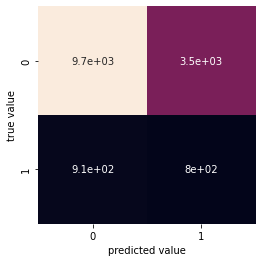

In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

mat = confusion_matrix(y_test, y_pred_label) #we dont do this because we dont get the whole number on the confusion matrixis to fet the whole number annotation
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [90]:
from sklearn.metrics import accuracy_score, recall_score

print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred_label))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_label))

Accuracy: 0.702
Recall: 0.467


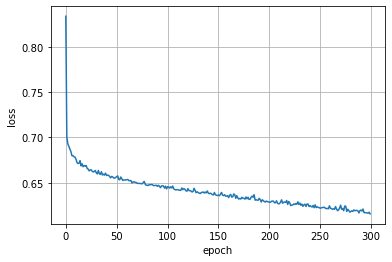

In [93]:
loss=history.history['loss']
def plot(loss):
        axis=list(range(0, len(loss),1))
        fig, ax = plt.subplots()
        ax.plot(axis, loss)
        ax.set_xlabel('epoch')
        ax.set_ylabel('loss')
        ax.grid()
        plt.show()
plot(loss)